In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [10]:
#upload dataset
train_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/train.csv", header = None, names = ['variance','skewness','curtosis','entropy','y'])
test_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/test.csv",  header = None, names = ['variance','skewness','curtosis','entropy','y'])

In [11]:
features = ['variance','skewness','curtosis','entropy']
outcome = 'y'

X_train = train_data[features].values #transfer to matrix
y_train = train_data[outcome].values
X_test = test_data[features].values
y_test = test_data[outcome].values

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [8]:
class LogisticRegressionSGD:
    def __init__(self, v, gamma_0, d, epochs):
        self.v = v
        self.gamma_0 = gamma_0
        self.d = d
        self.epochs = epochs
        self.w = None  # Model weights

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def compute_objective(self, X, y):
        logits = np.dot(X, self.w)
        log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE
        regularization = np.sum(self.w**2) / (2 * self.v)  # Gaussian prior
        return log_loss + regularization

    def compute_gradient(self, X, y):
        logits = np.dot(X, self.w)
        sigmoid_result = self.sigmoid(-y * logits)  # Sigmoid function
        grad_log_loss = -np.dot((1 - sigmoid_result) * y, X)  # Gradient of log-loss
        grad_regularization = self.w / self.v  # Gradient of regularization
        return grad_log_loss + grad_regularization

    def train(self, X_train, y_train, X_test, y_test):
        m, n = X_train.shape
        self.w = np.zeros(n)  # Initialize weights
        training_errors = []
        test_errors = []
        objectives = []

        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(m):
                # Compute learning rate
                t = epoch * m + i
                learning_rate = self.gamma_0 / (1 + (self.gamma_0 / self.d) * t)

                # Compute gradient for a single sample
                X_sample, y_sample = X_train[i:i+1], y_train[i:i+1]
                grad = self.compute_gradient(X_sample, y_sample)

                # Update weights
                self.w -= learning_rate * grad

            # Compute and store the objective value
            obj = self.compute_objective(X_train, y_train)
            objectives.append(obj)

            # Compute training and test errors
            #train_predictions = (self.sigmoid(np.dot(X_train, self.w)) >= 0.5).astype(int)
            #test_predictions = (self.sigmoid(np.dot(X_test, self.w)) >= 0.5).astype(int)
            train_predictions = np.where(self.sigmoid(np.dot(X_train, self.w)) >= 0.5, 1, -1)
            test_predictions = np.where(self.sigmoid(np.dot(X_test, self.w)) >= 0.5, 1, -1)
            training_errors.append(np.mean(train_predictions != y_train))
            test_errors.append(np.mean(test_predictions != y_test))
            
            if epoch % 10 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch}: Train Error: {training_errors[-1]:.4f}, Test Error: {test_errors[-1]:.4f}")

        return self.w, training_errors, test_errors, objectives

C:\Users\karri\AppData\Local\Temp\ipykernel_20300\1131218779.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors



variance = 0.01,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3486, Test Error: 0.3440
Epoch 10: Train Error: 0.3257, Test Error: 0.3300
Epoch 20: Train Error: 0.3394, Test Error: 0.3360
Epoch 30: Train Error: 0.3062, Test Error: 0.3060
Epoch 40: Train Error: 0.3245, Test Error: 0.3300
Epoch 50: Train Error: 0.3234, Test Error: 0.3280
Epoch 60: Train Error: 0.3303, Test Error: 0.3340
Epoch 70: Train Error: 0.3268, Test Error: 0.3300
Epoch 80: Train Error: 0.3303, Test Error: 0.3300
Epoch 90: Train Error: 0.3211, Test Error: 0.3280
Epoch 99: Train Error: 0.3257, Test Error: 0.3280

variance = 0.01,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3165, Test Error: 0.3160
Epoch 10: Train Error: 0.3349, Test Error: 0.3220
Epoch 20: Train Error: 0.1812, Test Error: 0.1740
Epoch 30: Train Error: 0.3222, Test Error: 0.3180
Epoch 40: Train Error: 0.3108, Test Error: 0.3160
Epoch 50: Train Error: 0.3268, Test Error: 0.3280
Epoch 60: Train Error: 0.3291, Test Error: 0.3300
Epoch 70

C:\Users\karri\AppData\Local\Temp\ipykernel_20300\3719302082.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 30: Train Error: 0.3005, Test Error: 0.3040
Epoch 40: Train Error: 0.3222, Test Error: 0.3280
Epoch 50: Train Error: 0.3165, Test Error: 0.3200
Epoch 60: Train Error: 0.3222, Test Error: 0.3260
Epoch 70: Train Error: 0.3154, Test Error: 0.3200
Epoch 80: Train Error: 0.3188, Test Error: 0.3260
Epoch 90: Train Error: 0.3188, Test Error: 0.3260
Epoch 99: Train Error: 0.3165, Test Error: 0.3220

variance = 0.01,learning rate =0.1, width=5
Epoch 0: Train Error: 0.3498, Test Error: 0.3440
Epoch 10: Train Error: 0.2718, Test Error: 0.2800
Epoch 20: Train Error: 0.3303, Test Error: 0.3340
Epoch 30: Train Error: 0.3165, Test Error: 0.3240
Epoch 40: Train Error: 0.3372, Test Error: 0.3340
Epoch 50: Train Error: 0.3188, Test Error: 0.3220
Epoch 60: Train Error: 0.2901, Test Error: 0.2940
Epoch 70: Train Error: 0.3108, Test Error: 0.3160
Epoch 80: Train Error: 0.3188, Test Error: 0.3260
Epoch 90: Train Error: 0.3177, Test Error: 0.3260
Epoch 99: Train Error: 0.3349, Test Error: 0.3360

varia

C:\Users\karri\AppData\Local\Temp\ipykernel_20300\3719302082.py:23: RuntimeWarning: overflow encountered in divide
  grad_regularization = self.w / self.v  # Gradient of regularization
C:\Users\karri\AppData\Local\Temp\ipykernel_20300\3719302082.py:49: RuntimeWarning: invalid value encountered in subtract
  self.w -= learning_rate * grad


Epoch 30: Train Error: 0.4461, Test Error: 0.4420
Epoch 40: Train Error: 0.4461, Test Error: 0.4420
Epoch 50: Train Error: 0.4461, Test Error: 0.4420
Epoch 60: Train Error: 0.4461, Test Error: 0.4420
Epoch 70: Train Error: 0.4461, Test Error: 0.4420
Epoch 80: Train Error: 0.4461, Test Error: 0.4420
Epoch 90: Train Error: 0.4461, Test Error: 0.4420
Epoch 99: Train Error: 0.4461, Test Error: 0.4420

variance = 0.01,learning rate =0.1, width=100
Epoch 0: Train Error: 0.4461, Test Error: 0.4420
Epoch 10: Train Error: 0.4461, Test Error: 0.4420
Epoch 20: Train Error: 0.4461, Test Error: 0.4420
Epoch 30: Train Error: 0.4461, Test Error: 0.4420
Epoch 40: Train Error: 0.4461, Test Error: 0.4420
Epoch 50: Train Error: 0.4461, Test Error: 0.4420
Epoch 60: Train Error: 0.4461, Test Error: 0.4420
Epoch 70: Train Error: 0.4461, Test Error: 0.4420
Epoch 80: Train Error: 0.4461, Test Error: 0.4420
Epoch 90: Train Error: 0.4461, Test Error: 0.4420
Epoch 99: Train Error: 0.4461, Test Error: 0.4420

var

C:\Users\karri\AppData\Local\Temp\ipykernel_20300\3719302082.py:15: RuntimeWarning: overflow encountered in exp
  log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE


Epoch 30: Train Error: 0.3142, Test Error: 0.3220
Epoch 40: Train Error: 0.3314, Test Error: 0.3320
Epoch 50: Train Error: 0.3257, Test Error: 0.3280
Epoch 60: Train Error: 0.3383, Test Error: 0.3420
Epoch 70: Train Error: 0.3268, Test Error: 0.3280
Epoch 80: Train Error: 0.3532, Test Error: 0.3480
Epoch 90: Train Error: 0.3245, Test Error: 0.3280
Epoch 99: Train Error: 0.3222, Test Error: 0.3260

variance = 0.01,learning rate =0.5, width=50
Epoch 0: Train Error: 0.4461, Test Error: 0.4420
Epoch 10: Train Error: 0.4461, Test Error: 0.4420
Epoch 20: Train Error: 0.4461, Test Error: 0.4420
Epoch 30: Train Error: 0.4461, Test Error: 0.4420
Epoch 40: Train Error: 0.4461, Test Error: 0.4420
Epoch 50: Train Error: 0.4461, Test Error: 0.4420
Epoch 60: Train Error: 0.4461, Test Error: 0.4420
Epoch 70: Train Error: 0.4461, Test Error: 0.4420
Epoch 80: Train Error: 0.4461, Test Error: 0.4420
Epoch 90: Train Error: 0.4461, Test Error: 0.4420
Epoch 99: Train Error: 0.4461, Test Error: 0.4420

vari

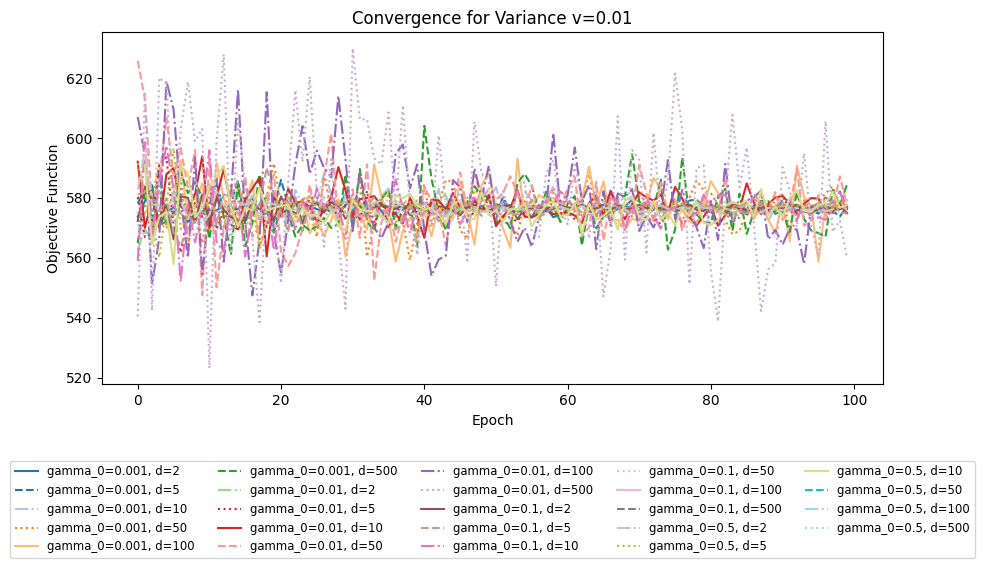


variance = 0.1,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3544, Test Error: 0.3500
Epoch 10: Train Error: 0.3567, Test Error: 0.3620
Epoch 20: Train Error: 0.3567, Test Error: 0.3620
Epoch 30: Train Error: 0.3567, Test Error: 0.3620
Epoch 40: Train Error: 0.3567, Test Error: 0.3620
Epoch 50: Train Error: 0.3567, Test Error: 0.3620
Epoch 60: Train Error: 0.3567, Test Error: 0.3620
Epoch 70: Train Error: 0.3567, Test Error: 0.3620
Epoch 80: Train Error: 0.3567, Test Error: 0.3620
Epoch 90: Train Error: 0.3567, Test Error: 0.3620
Epoch 99: Train Error: 0.3567, Test Error: 0.3620

variance = 0.1,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3567, Test Error: 0.3580
Epoch 20: Train Error: 0.3567, Test Error: 0.3580
Epoch 30: Train Error: 0.3567, Test Error: 0.3620
Epoch 40: Train Error: 0.3567, Test Error: 0.3620
Epoch 50: Train Error: 0.3567, Test Error: 0.3620
Epoch 60: Train Error: 0.3567, Test Error: 0.3620
Epoch 70: 

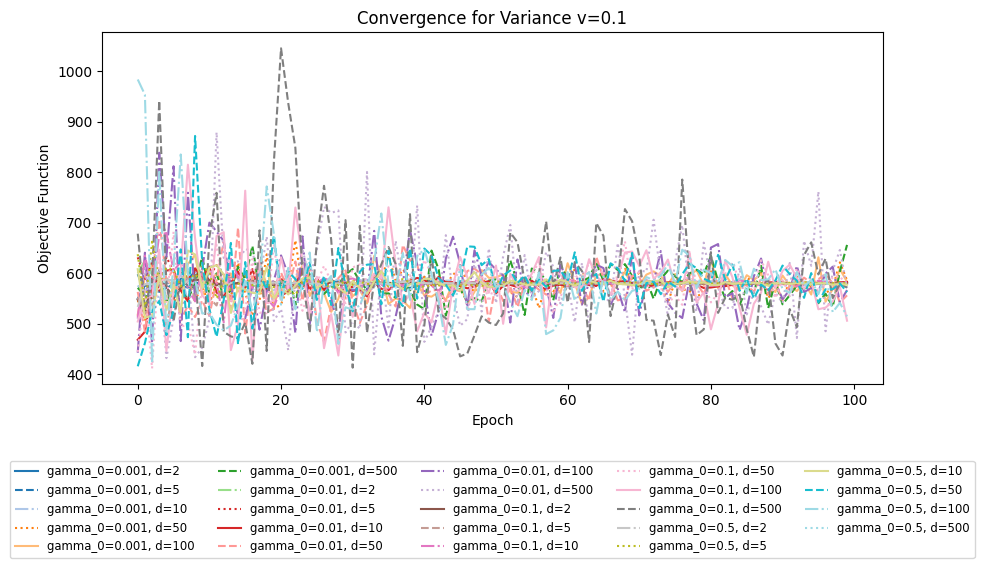


variance = 0.5,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 0.5,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: 

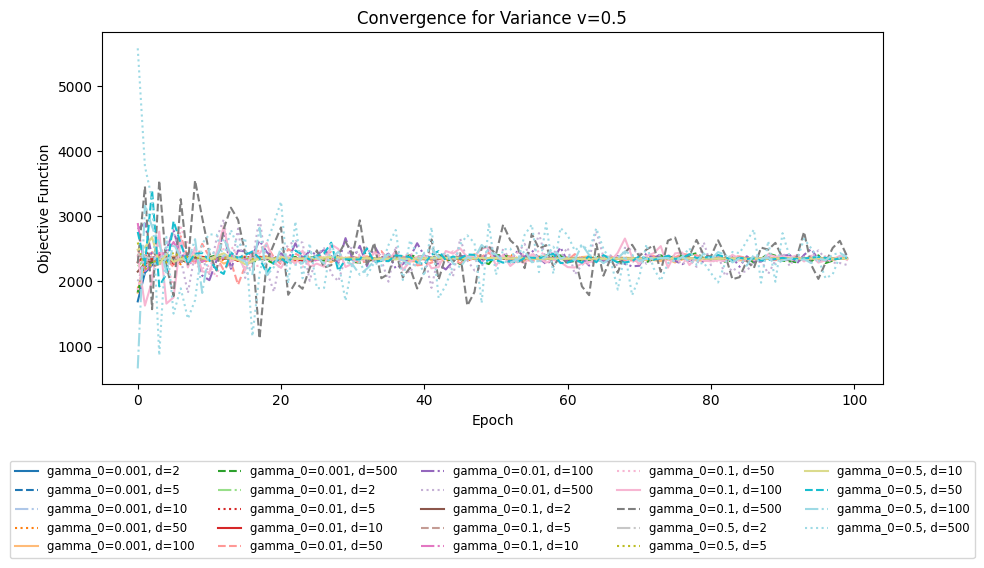


variance = 1,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 1,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Trai

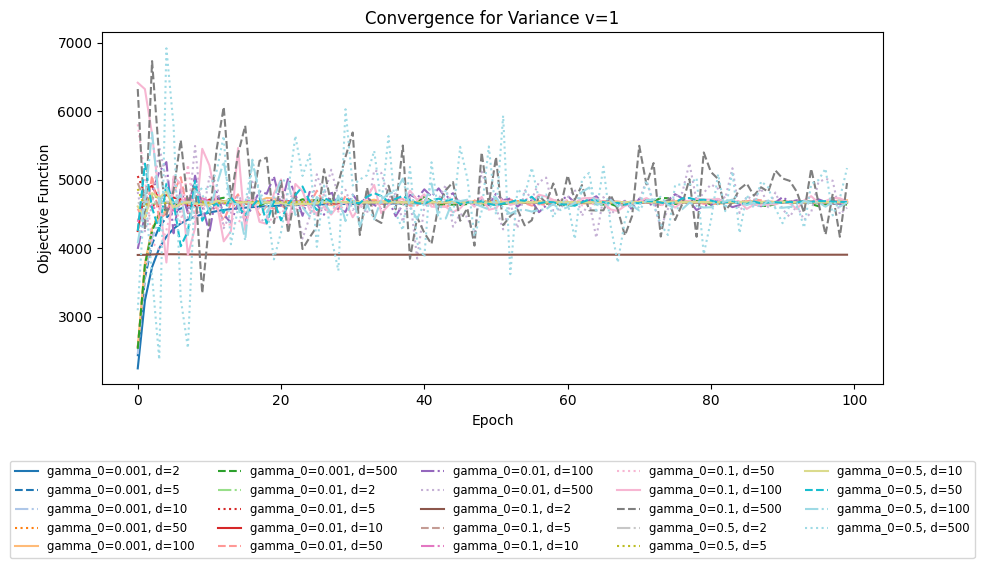


variance = 3,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3567, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 3,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Trai

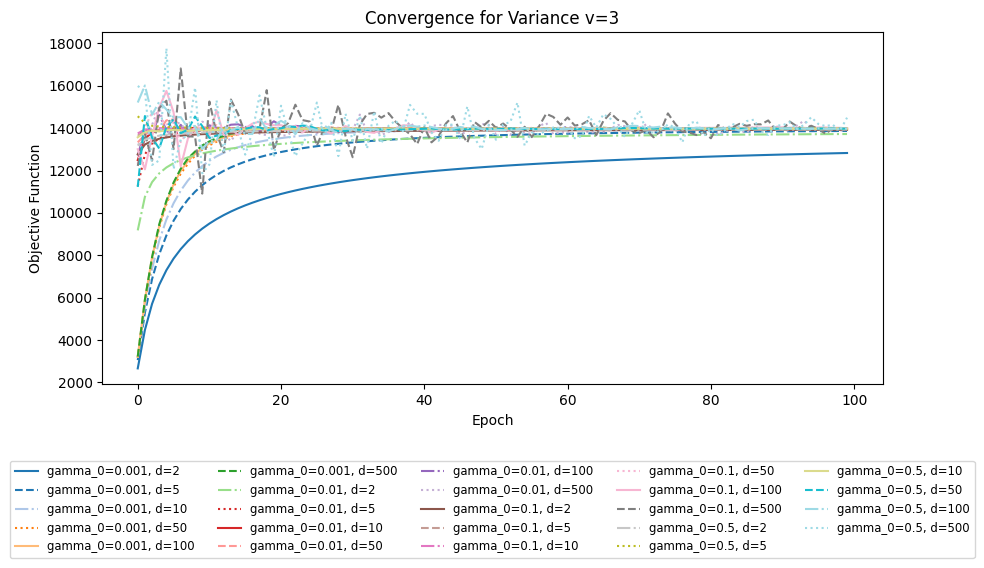


variance = 5,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 5,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3567, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Trai

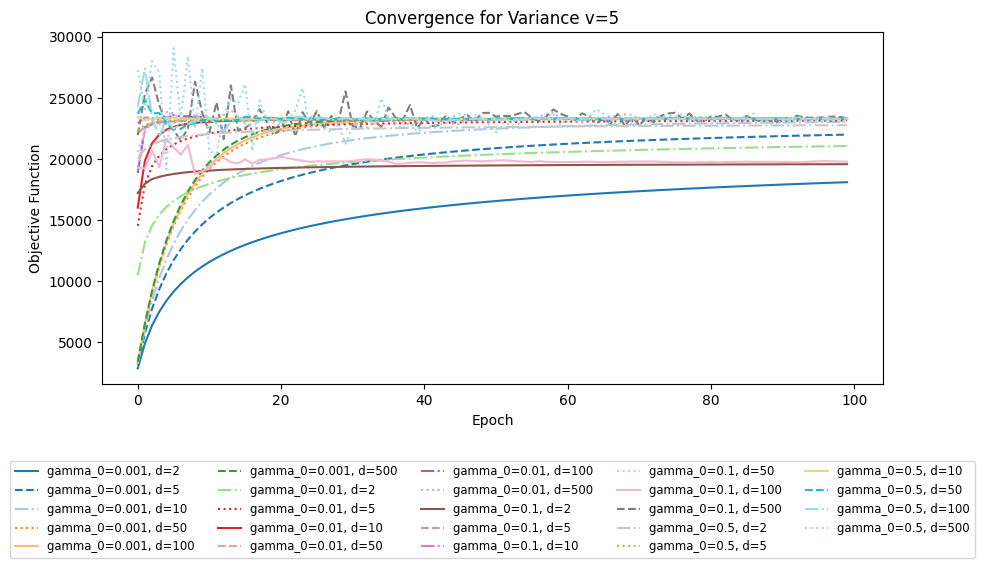


variance = 10,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 10,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Tr

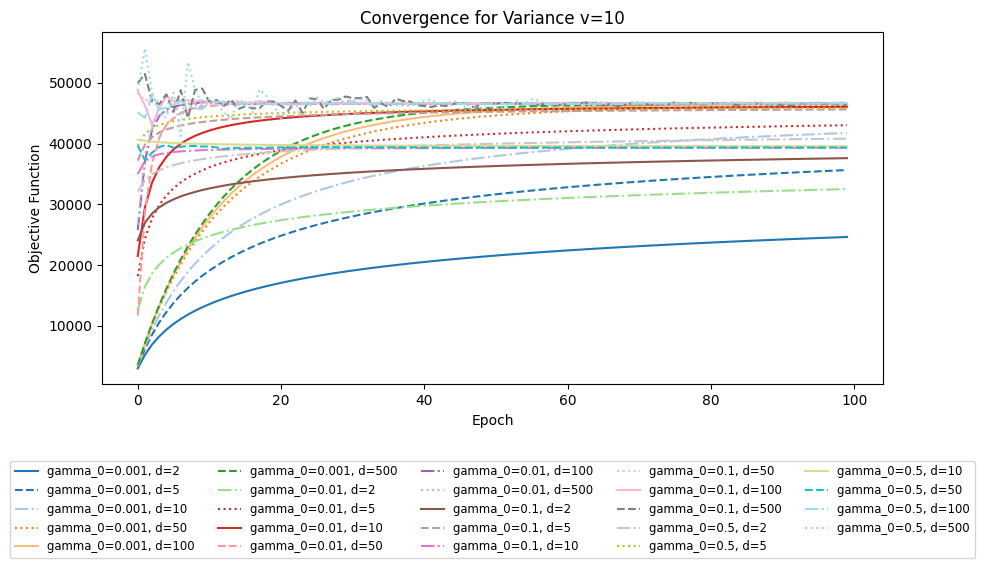


variance = 100,learning rate =0.001, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

variance = 100,learning rate =0.001, width=5
Epoch 0: Train Error: 0.3567, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: 

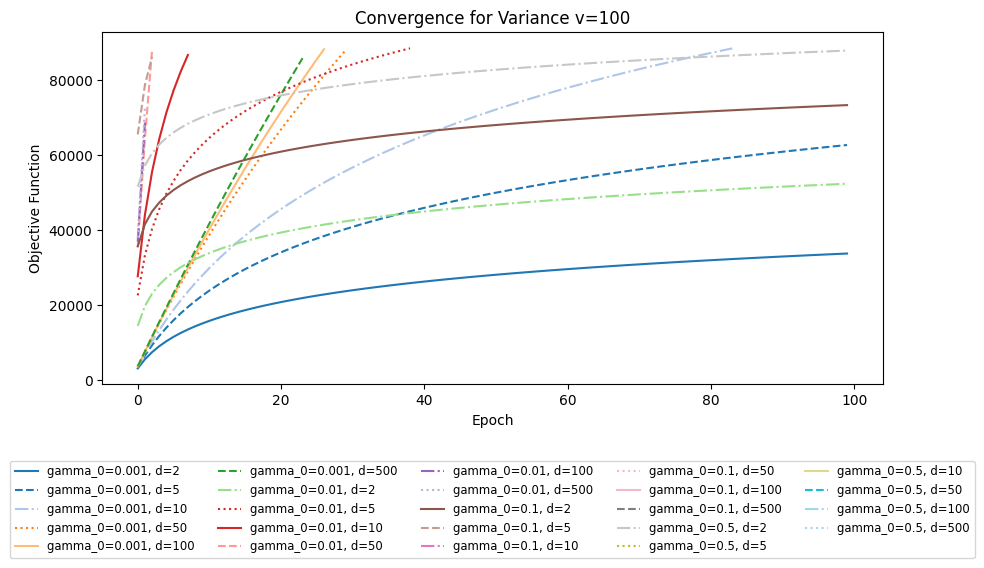

{0.01: {(0.001,
   2): ([0.3486238532110092,
    0.2694954128440367,
    0.23394495412844038,
    0.3394495412844037,
    0.3268348623853211,
    0.3348623853211009,
    0.3268348623853211,
    0.3360091743119266,
    0.3440366972477064,
    0.3119266055045872,
    0.3256880733944954,
    0.3291284403669725,
    0.3176605504587156,
    0.3291284403669725,
    0.3176605504587156,
    0.3165137614678899,
    0.3302752293577982,
    0.30275229357798167,
    0.3176605504587156,
    0.3360091743119266,
    0.3394495412844037,
    0.32224770642201833,
    0.31880733944954126,
    0.32454128440366975,
    0.3084862385321101,
    0.32339449541284404,
    0.3291284403669725,
    0.31995412844036697,
    0.3486238532110092,
    0.30963302752293576,
    0.30619266055045874,
    0.3038990825688073,
    0.3291284403669725,
    0.30504587155963303,
    0.3038990825688073,
    0.32339449541284404,
    0.30504587155963303,
    0.31077981651376146,
    0.3165137614678899,
    0.32339449541284404,
    0

In [12]:
variances = [0.01, 0.1, 0.5, 1, 3, 5, 10, 100]
gamma_0_values = [0.001, 0.01, 0.1, 0.5]
d_values = [2, 5, 10, 50, 100, 500]
epochs = 100

# Define unique line styles and color map
line_styles = cycle(["-", "--", "-.", ":"])  # Line styles
color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors

# Store results for each variance
results_by_variance = {}

for v in variances:
    results = {}
    plt.figure(figsize=(10, 6))

    for gamma_0 in gamma_0_values:
        for d in d_values:
            print(f"\nvariance = {v},learning rate ={gamma_0}, width={d}")
            # Call the logistic regression function
            logsgd = LogisticRegressionSGD(v, gamma_0, d, epochs)
            w, training_errors, test_errors, objectives = logsgd.train(X_train, y_train, X_test, y_test)

            # Store results for each combination
            results[(gamma_0, d)] = (training_errors, test_errors, objectives)

            # Plot the convergence of the objective function for this combination
            idx = gamma_0_values.index(gamma_0) * len(d_values) + d_values.index(d)
            plt.plot(objectives, label=f"gamma_0={gamma_0}, d={d}", 
                     color=color_map(idx), linestyle=next(line_styles))

    # Store all results for this variance
    results_by_variance[v] = results

    # Plot convergence for this variance
    plt.xlabel("Epoch")
    plt.ylabel("Objective Function")
    plt.title(f"Convergence for Variance v={v}")
    plt.legend(
    bbox_to_anchor=(0.5, -0.2),  # Place at the bottom center
    loc="upper center",
    fontsize="small",
    ncol=5  # Adjust the number of columns
)
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()
    
results_by_variance

In [13]:
class LogisticRegressionSGDML:
    def __init__(self, gamma_0, d, epochs):
        self.gamma_0 = gamma_0
        self.d = d
        self.epochs = epochs
        self.w = None  # Model weights

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def compute_objective_ml(self, X, y):
        logits = np.dot(X, self.w)
        log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE
        return log_loss
    
    def compute_gradient_ml(self, X, y):
        logits = np.dot(X, self.w)
        sigmoid_result = self.sigmoid(-y * logits)  # Sigmoid function
        grad_log_loss = -np.dot((1 - sigmoid_result) * y, X)  # Gradient of log-loss
        return grad_log_loss
    
    def train(self, X_train, y_train, X_test, y_test):
        m, n = X_train.shape
        self.w = np.zeros(n)  # Initialize weights
        training_errors = []
        test_errors = []
        objectives = []

        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(m):
                # Compute learning rate
                t = epoch * m + i
                learning_rate = self.gamma_0 / (1 + (self.gamma_0 / self.d) * t)

                # Compute gradient for a single sample
                X_sample, y_sample = X_train[i:i+1], y_train[i:i+1]
                grad = self.compute_gradient_ml(X_sample, y_sample)

                # Update weights
                self.w -= learning_rate * grad

            # Compute and store the objective value
            obj = self.compute_objective_ml(X_train, y_train)
            objectives.append(obj)

            # Compute training and test errors
            #train_predictions = (self.sigmoid(np.dot(X_train, self.w)) >= 0.5).astype(int)
            #test_predictions = (self.sigmoid(np.dot(X_test, self.w)) >= 0.5).astype(int)
            train_predictions = np.where(self.sigmoid(np.dot(X_train, self.w)) >= 0.5, 1, -1)
            test_predictions = np.where(self.sigmoid(np.dot(X_test, self.w)) >= 0.5, 1, -1)
            training_errors.append(np.mean(train_predictions != y_train))
            test_errors.append(np.mean(test_predictions != y_test))

            if epoch % 10 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch}: Train Error: {training_errors[-1]:.4f}, Test Error: {test_errors[-1]:.4f}")

        return self.w, training_errors, test_errors, objectives

C:\Users\karri\AppData\Local\Temp\ipykernel_20300\3942689472.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors



learning rate =0.001, width=2
Epoch 0: Train Error: 0.3567, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.001, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620


C:\Users\karri\AppData\Local\Temp\ipykernel_20300\2966810042.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.001, width=10
Epoch 0: Train Error: 0.3567, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620


C:\Users\karri\AppData\Local\Temp\ipykernel_20300\2966810042.py:14: RuntimeWarning: overflow encountered in exp
  log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE


Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.001, width=50
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.001, width=100
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test E

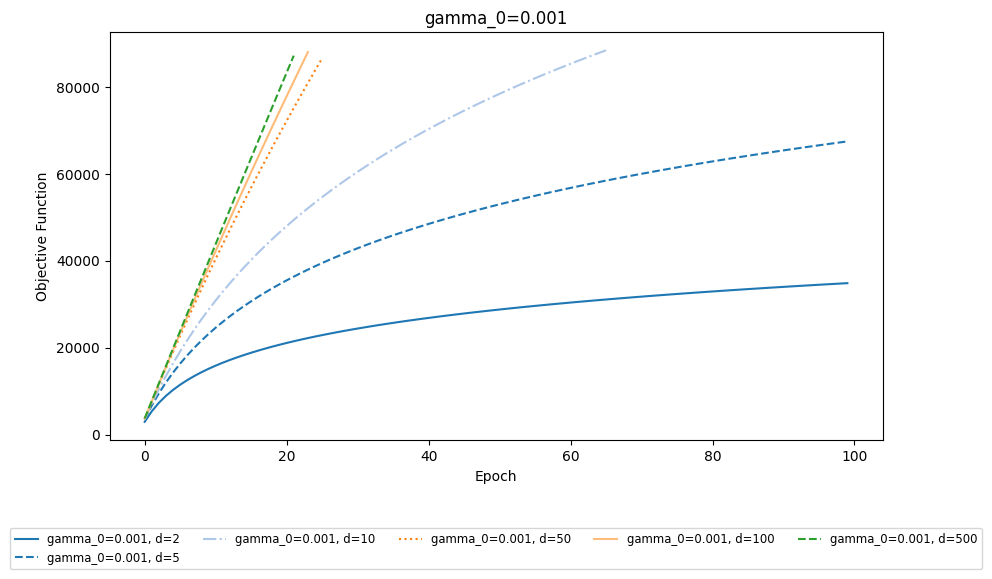


learning rate =0.01, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.01, width=5
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error:

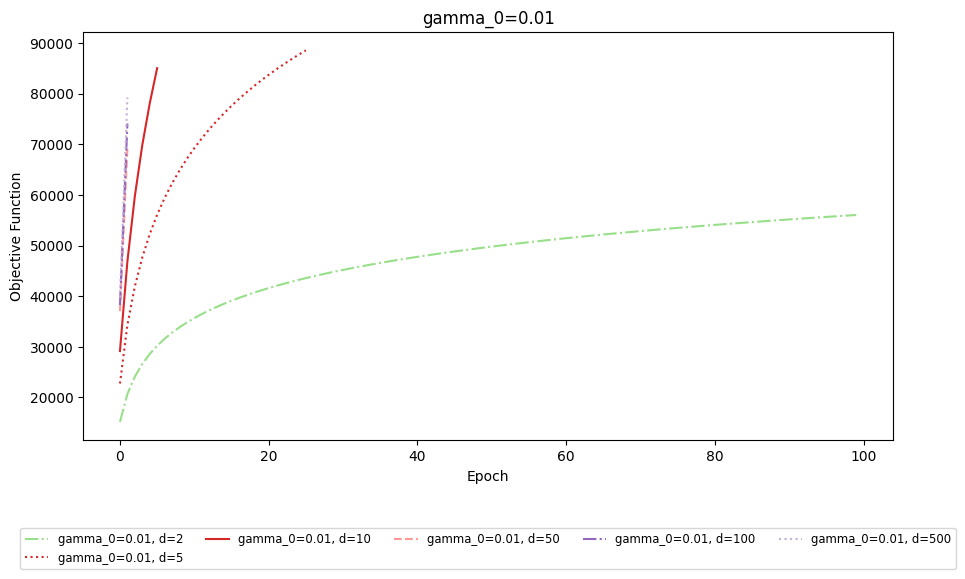


learning rate =0.1, width=2
Epoch 0: Train Error: 0.3578, Test Error: 0.3620
Epoch 10: Train Error: 0.3578, Test Error: 0.3620
Epoch 20: Train Error: 0.3578, Test Error: 0.3620
Epoch 30: Train Error: 0.3578, Test Error: 0.3620
Epoch 40: Train Error: 0.3578, Test Error: 0.3620
Epoch 50: Train Error: 0.3578, Test Error: 0.3620
Epoch 60: Train Error: 0.3578, Test Error: 0.3620
Epoch 70: Train Error: 0.3578, Test Error: 0.3620
Epoch 80: Train Error: 0.3578, Test Error: 0.3620
Epoch 90: Train Error: 0.3578, Test Error: 0.3620
Epoch 99: Train Error: 0.3578, Test Error: 0.3620

learning rate =0.1, width=5
Epoch 0: Train Error: 0.4989, Test Error: 0.4920
Epoch 10: Train Error: 0.5023, Test Error: 0.4920
Epoch 20: Train Error: 0.5000, Test Error: 0.4920
Epoch 30: Train Error: 0.5000, Test Error: 0.4920
Epoch 40: Train Error: 0.4989, Test Error: 0.4920
Epoch 50: Train Error: 0.4989, Test Error: 0.4920
Epoch 60: Train Error: 0.4989, Test Error: 0.4920
Epoch 70: Train Error: 0.4989, Test Error: 0

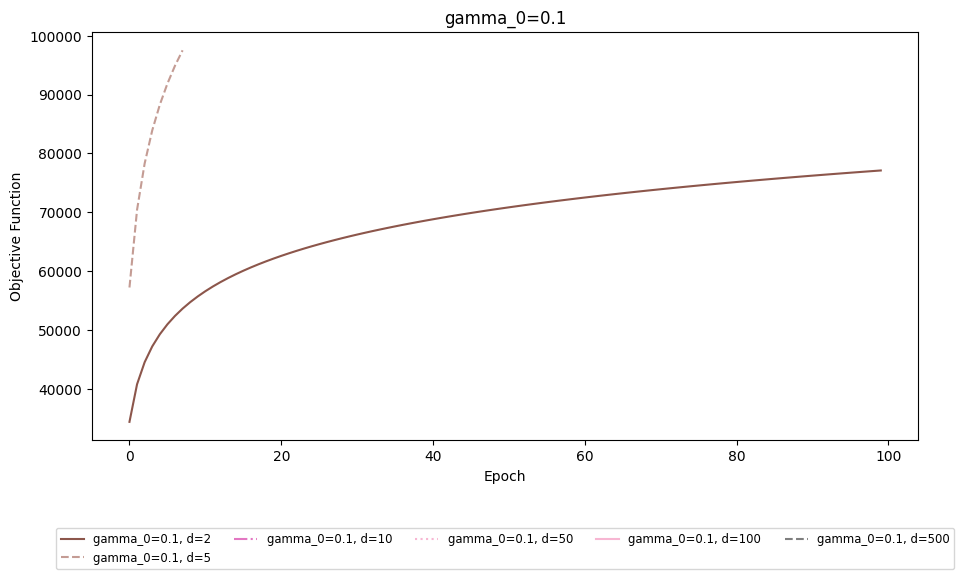


learning rate =0.5, width=2
Epoch 0: Train Error: 0.3635, Test Error: 0.3680
Epoch 10: Train Error: 0.3624, Test Error: 0.3660
Epoch 20: Train Error: 0.3624, Test Error: 0.3620
Epoch 30: Train Error: 0.3624, Test Error: 0.3620
Epoch 40: Train Error: 0.3624, Test Error: 0.3620
Epoch 50: Train Error: 0.3624, Test Error: 0.3620
Epoch 60: Train Error: 0.3624, Test Error: 0.3620
Epoch 70: Train Error: 0.3624, Test Error: 0.3620
Epoch 80: Train Error: 0.3624, Test Error: 0.3620
Epoch 90: Train Error: 0.3624, Test Error: 0.3620
Epoch 99: Train Error: 0.3624, Test Error: 0.3620

learning rate =0.5, width=5
Epoch 0: Train Error: 0.4920, Test Error: 0.4900
Epoch 10: Train Error: 0.4943, Test Error: 0.4900
Epoch 20: Train Error: 0.4943, Test Error: 0.4900
Epoch 30: Train Error: 0.4954, Test Error: 0.4900
Epoch 40: Train Error: 0.4954, Test Error: 0.4900
Epoch 50: Train Error: 0.4954, Test Error: 0.4900
Epoch 60: Train Error: 0.4966, Test Error: 0.4900
Epoch 70: Train Error: 0.4966, Test Error: 0

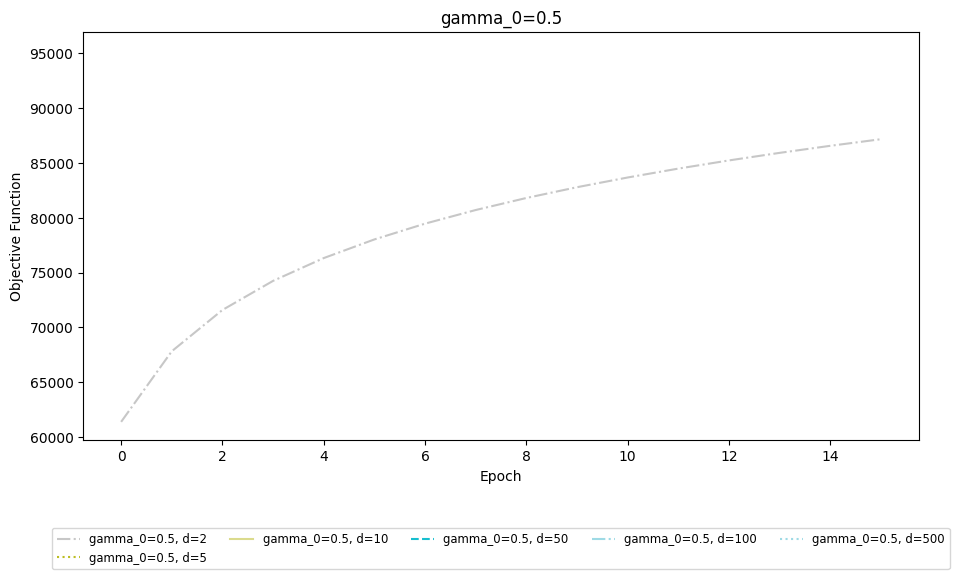

{0.001: {(0.001,
   2): ([0.356651376146789,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376147,
    0.3577981651376

In [14]:
gamma_0_values = [0.001, 0.01, 0.1, 0.5]
d_values = [2, 5, 10, 50, 100, 500]
epochs = 100

# Define unique line styles and color map
line_styles = cycle(["-", "--", "-.", ":"])  # Line styles
color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors

# Store results for each variance
results_by_variance = {}

for gamma_0 in gamma_0_values:
    plt.figure(figsize=(10, 6))
    for d in d_values:
        print(f"\nlearning rate ={gamma_0}, width={d}")
        # Call the logistic regression function
        logsgdml = LogisticRegressionSGDML(gamma_0, d, epochs)
        
        w, training_errors, test_errors, objectives = logsgdml.train(X_train, y_train, X_test, y_test)

        # Store results for each combination
        results[(gamma_0, d)] = (training_errors, test_errors, objectives)

        idx = gamma_0_values.index(gamma_0) * len(d_values) + d_values.index(d)
        plt.plot(objectives, label=f"gamma_0={gamma_0}, d={d}", 
                     color=color_map(idx), linestyle=next(line_styles))

    # Store all results for this variance
    results_by_variance[gamma_0] = results

    # Plot convergence for this variance
    plt.xlabel("Epoch")
    plt.ylabel("Objective Function")
    plt.title(f"gamma_0={gamma_0}")
    plt.legend(
    bbox_to_anchor=(0.5, -0.2),  # Place at the bottom center
    loc="upper center",
    fontsize="small",
    ncol=5  # Adjust the number of columns
)
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()
    
results_by_variance